# <center> CISC 867 - Deep Learning: Project 1 </center>

# Part I: Data Preparation

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.optimizers import adam_v2, rmsprop_v2, gradient_descent_v2
from keras.regularizers import l2
import keras_tuner as kt
# Load the TensorBoard notebook extension
%load_ext tensorboard 
import datetime
import math

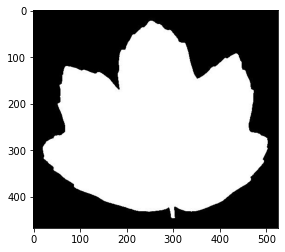

In [2]:
import cv2
img_sample = cv2.imread('1.jpg')
plt.imshow(img_sample)

In [3]:
train = pd.read_csv('leaf-classification/train.csv/train.csv')

In [4]:
df = train.copy()

<AxesSubplot:>

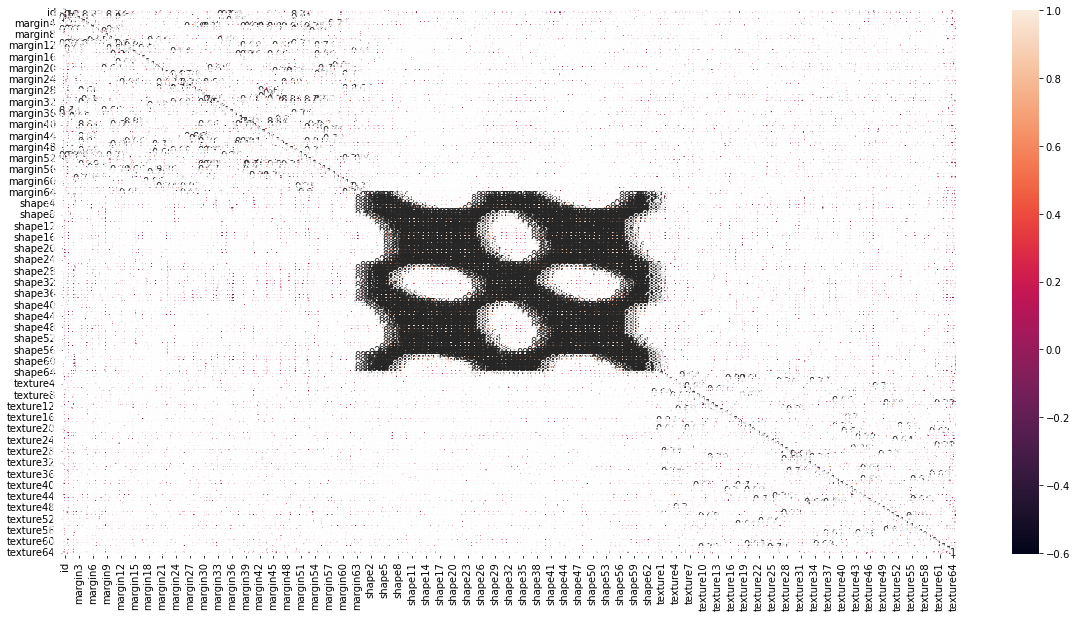

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [6]:
df.shape

(990, 194)

In [7]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [8]:
# find the pairwise correlation of all columns in the dataframe 
df.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [9]:
# describe the data
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [10]:
# information about the data (such as columns and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [11]:
df['species']

0                Acer_Opalus
1      Pterocarya_Stenoptera
2       Quercus_Hartwissiana
3            Tilia_Tomentosa
4         Quercus_Variabilis
               ...          
985     Magnolia_Salicifolia
986              Acer_Pictum
987       Alnus_Maximowiczii
988            Quercus_Rubra
989           Quercus_Afares
Name: species, Length: 990, dtype: object

In [12]:
# Turn species column into categorical 
df['species'] = pd.Categorical(df['species'])
df['species'] = df['species'].cat.codes
# Turn species column into one-hot vector
y = to_categorical(df['species'])

In [14]:
df.describe()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,49.000000,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,28.591824,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,24.000000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,49.000000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,74.000000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,98.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [15]:
df.drop('id', axis=1, inplace=True)

As noticed, after dropping the id column, we would scale the column 'species' as their values lie between 0 and 98.

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y.shape

(990, 99)

In [20]:
df.drop('species', axis=1, inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)

In [22]:
df.shape

(990, 192)

# Part II: Training a Neural Network

Trainig a Neural Network with different hyperparametrs such as: 

- learning rate
- batch size
- kernel initializers
- optimizers
- regularization
- hidden units 
- Dropout rate

## 1- Learning Rate

## Model 1

Here we would test with the Adam optimizer for different learning rates, using 150 epochs with early stopping to avoid overfitting, 512 hidden units and a batch size of 64

- learning rate = 0.0001
- No. of epochs = 150 (with early stopping)
- batch size = 64
- optimizer = Adam
- hidden units = 512

In [23]:
# define Sequential model
model = Sequential()

In [24]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )
# model.add(BatchNormalization()) # Data Normalization 

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [25]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [27]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdirS/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.5908 - accuracy: 0.0139 - val_loss: 4.5841 - val_accuracy: 0.0455 - 599ms/epoch - 24ms/step
Epoch 2/150
25/25 - 0s - loss: 4.5782 - accuracy: 0.0354 - val_loss: 4.5759 - val_accuracy: 0.0657 - 130ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 4.5662 - accuracy: 0.0934 - val_loss: 4.5673 - val_accuracy: 0.0960 - 159ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 4.5539 - accuracy: 0.1742 - val_loss: 4.5585 - val_accuracy: 0.1364 - 150ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 4.5418 - accuracy: 0.2386 - val_loss: 4.5494 - val_accuracy: 0.1616 - 146ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 4.5291 - accuracy: 0.2967 - val_loss: 4.5399 - val_accuracy: 0.1717 - 141ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 4.5162 - accuracy: 0.3359 - val_loss: 4.5301 - val_accuracy: 0.1970 - 132ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 4.5028 - accuracy: 0.3712 - val_loss: 4.5200 - val_accuracy: 0.2121 - 129ms/epoch - 5ms/step
Epoch 9

In [29]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 4.3258 - accuracy: 0.2626
Test Accuracy: 0.263


In [30]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:09 ago. (Use '!kill 24660' to kill it.)

## Model 2

- learning rate = 0.001
- No. of epochs = 150 (with early stopping)
- batch size = 64
- optimizer = Adam
- hidden units = 512

In [31]:
# define Sequential model
model = Sequential()

In [32]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [33]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [35]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [36]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],         
          verbose=2)

Epoch 1/150
25/25 - 0s - loss: 4.5586 - accuracy: 0.0884 - val_loss: 4.5141 - val_accuracy: 0.1768 - 488ms/epoch - 20ms/step
Epoch 2/150
25/25 - 0s - loss: 4.4159 - accuracy: 0.3889 - val_loss: 4.3829 - val_accuracy: 0.3131 - 126ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 4.2217 - accuracy: 0.5114 - val_loss: 4.1846 - val_accuracy: 0.3636 - 132ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 3.9367 - accuracy: 0.5379 - val_loss: 3.9052 - val_accuracy: 0.3687 - 128ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 3.5695 - accuracy: 0.6023 - val_loss: 3.5595 - val_accuracy: 0.4192 - 129ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 3.1701 - accuracy: 0.6073 - val_loss: 3.2103 - val_accuracy: 0.4394 - 133ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 2.7862 - accuracy: 0.6566 - val_loss: 2.8822 - val_accuracy: 0.4798 - 117ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 2.4373 - accuracy: 0.6616 - val_loss: 2.5598 - val_accuracy: 0.5202 - 147ms/epoch - 6ms/step
Epoch 9

In [37]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.9495
Test Accuracy: 0.949


In [38]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:14 ago. (Use '!kill 24660' to kill it.)

## Model 3

- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- batch size = 64
- optimizer = Adam
- hidden units = 512

In [39]:
# define Sequential model
model = Sequential()

In [40]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [41]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [42]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [43]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [44]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.0160 - accuracy: 0.1742 - val_loss: 2.9839 - val_accuracy: 0.3283 - 609ms/epoch - 24ms/step
Epoch 2/150
25/25 - 0s - loss: 1.9701 - accuracy: 0.5480 - val_loss: 1.3594 - val_accuracy: 0.6768 - 145ms/epoch - 6ms/step
Epoch 3/150
25/25 - 0s - loss: 0.8539 - accuracy: 0.8232 - val_loss: 0.7182 - val_accuracy: 0.8182 - 161ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4662 - accuracy: 0.8952 - val_loss: 0.5337 - val_accuracy: 0.8586 - 121ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2740 - accuracy: 0.9508 - val_loss: 0.3317 - val_accuracy: 0.9293 - 123ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1575 - accuracy: 0.9811 - val_loss: 0.2700 - val_accuracy: 0.9444 - 127ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1078 - accuracy: 0.9886 - val_loss: 0.2538 - val_accuracy: 0.9394 - 127ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0810 - accuracy: 0.9924 - val_loss: 0.1693 - val_accuracy: 0.9798 - 128ms/epoch - 5ms/step
Epoch 9

In [45]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9697
Test Accuracy: 0.970


In [46]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:17 ago. (Use '!kill 24660' to kill it.)

## Model 4

- learning rate = 0.1
- No. of epochs = 150 (with early stopping)
- batch size = 64
- optimizer = Adam
- hidden units = 512

In [47]:
# define Sequential model
model = Sequential()

In [48]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )


# Output layer
model.add(Dense(99, activation= 'softmax'))

In [49]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [50]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [51]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [52]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 8.8724 - accuracy: 0.1288 - val_loss: 4.7937 - val_accuracy: 0.3434 - 549ms/epoch - 22ms/step
Epoch 2/150
25/25 - 0s - loss: 3.3840 - accuracy: 0.5063 - val_loss: 2.7729 - val_accuracy: 0.6061 - 120ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 2.1196 - accuracy: 0.6957 - val_loss: 2.8069 - val_accuracy: 0.6212 - 147ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 2.3594 - accuracy: 0.7323 - val_loss: 3.2052 - val_accuracy: 0.6919 - 158ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 2.0269 - accuracy: 0.7803 - val_loss: 2.6459 - val_accuracy: 0.7222 - 143ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 1.7706 - accuracy: 0.8434 - val_loss: 3.0845 - val_accuracy: 0.7323 - 122ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 1.6828 - accuracy: 0.8523 - val_loss: 2.4559 - val_accuracy: 0.7677 - 115ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 2.1170 - accuracy: 0.8371 - val_loss: 5.1992 - val_accuracy: 0.6919 - 127ms/epoch - 5ms/step
Epoch 9

In [53]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 3.2797 - accuracy: 0.8939
Test Accuracy: 0.894


In [54]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:20 ago. (Use '!kill 24660' to kill it.)

## Model 5

- learning rate = 1
- No. of epochs = 150 (with early stopping)
- batch size = 64
- optimizer = Adam
- hidden units = 512

In [55]:
# define Sequential model
model = Sequential()

In [56]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [57]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [58]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [59]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [60]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 1110.4611 - accuracy: 0.0063 - val_loss: 1753.8492 - val_accuracy: 0.0051 - 532ms/epoch - 21ms/step
Epoch 2/150
25/25 - 0s - loss: 2899.5386 - accuracy: 0.0139 - val_loss: 3516.2878 - val_accuracy: 0.0202 - 138ms/epoch - 6ms/step
Epoch 3/150
25/25 - 0s - loss: 4414.6772 - accuracy: 0.0063 - val_loss: 3773.0483 - val_accuracy: 0.0152 - 141ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 2475.4011 - accuracy: 0.0088 - val_loss: 1776.2488 - val_accuracy: 0.0051 - 132ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 1368.0710 - accuracy: 0.0240 - val_loss: 1076.5554 - val_accuracy: 0.0657 - 132ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 843.8173 - accuracy: 0.0240 - val_loss: 807.9579 - val_accuracy: 0.0505 - 140ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 798.6088 - accuracy: 0.0379 - val_loss: 795.4453 - val_accuracy: 0.0707 - 139ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 769.7679 - accuracy: 0.0404 - val_loss: 938.0508 - val_accurac

In [61]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 500.5754 - accuracy: 0.0707
Test Accuracy: 0.071


In [62]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:23 ago. (Use '!kill 24660' to kill it.)

## 2- Batch Size

## Model 6

- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [63]:
# define Sequential model
model = Sequential()

In [64]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [65]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [66]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [67]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [68]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.0173 - accuracy: 0.1540 - val_loss: 2.9893 - val_accuracy: 0.3636 - 516ms/epoch - 21ms/step
Epoch 2/150
25/25 - 0s - loss: 1.9365 - accuracy: 0.5732 - val_loss: 1.3891 - val_accuracy: 0.6364 - 121ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 0.8905 - accuracy: 0.7917 - val_loss: 0.7785 - val_accuracy: 0.8131 - 139ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4616 - accuracy: 0.8977 - val_loss: 0.4681 - val_accuracy: 0.9040 - 109ms/epoch - 4ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2362 - accuracy: 0.9621 - val_loss: 0.3896 - val_accuracy: 0.9192 - 129ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1603 - accuracy: 0.9760 - val_loss: 0.2388 - val_accuracy: 0.9646 - 128ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1009 - accuracy: 0.9912 - val_loss: 0.2002 - val_accuracy: 0.9798 - 129ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0690 - accuracy: 0.9924 - val_loss: 0.2046 - val_accuracy: 0.9646 - 129ms/epoch - 5ms/step
Epoch 9

In [69]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9646
Test Accuracy: 0.965


In [70]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:25 ago. (Use '!kill 24660' to kill it.)

## Model 7

- batch size = 64
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [71]:
# define Sequential model
model = Sequential()

In [72]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [73]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [74]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [75]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [76]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=64, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
13/13 - 1s - loss: 4.3010 - accuracy: 0.1427 - val_loss: 3.6004 - val_accuracy: 0.3788 - 504ms/epoch - 39ms/step
Epoch 2/150
13/13 - 0s - loss: 2.8259 - accuracy: 0.4672 - val_loss: 2.1924 - val_accuracy: 0.4495 - 103ms/epoch - 8ms/step
Epoch 3/150
13/13 - 0s - loss: 1.5193 - accuracy: 0.6995 - val_loss: 1.2393 - val_accuracy: 0.7576 - 112ms/epoch - 9ms/step
Epoch 4/150
13/13 - 0s - loss: 0.8450 - accuracy: 0.8346 - val_loss: 0.7294 - val_accuracy: 0.8737 - 111ms/epoch - 9ms/step
Epoch 5/150
13/13 - 0s - loss: 0.4861 - accuracy: 0.9015 - val_loss: 0.5302 - val_accuracy: 0.8889 - 93ms/epoch - 7ms/step
Epoch 6/150
13/13 - 0s - loss: 0.3066 - accuracy: 0.9533 - val_loss: 0.4147 - val_accuracy: 0.8939 - 95ms/epoch - 7ms/step
Epoch 7/150
13/13 - 0s - loss: 0.2130 - accuracy: 0.9722 - val_loss: 0.3137 - val_accuracy: 0.9394 - 104ms/epoch - 8ms/step
Epoch 8/150
13/13 - 0s - loss: 0.1515 - accuracy: 0.9823 - val_loss: 0.2703 - val_accuracy: 0.9596 - 102ms/epoch - 8ms/step
Epoch 9/1

In [77]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9697
Test Accuracy: 0.970


In [78]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:27 ago. (Use '!kill 24660' to kill it.)

## Model 8

- batch size = 128
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [79]:
# define Sequential model
model = Sequential()

In [80]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [81]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [83]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [84]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=128, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
7/7 - 1s - loss: 4.4596 - accuracy: 0.0884 - val_loss: 4.0913 - val_accuracy: 0.3333 - 544ms/epoch - 78ms/step
Epoch 2/150
7/7 - 0s - loss: 3.6256 - accuracy: 0.4672 - val_loss: 3.1232 - val_accuracy: 0.4192 - 97ms/epoch - 14ms/step
Epoch 3/150
7/7 - 0s - loss: 2.5454 - accuracy: 0.5997 - val_loss: 2.2180 - val_accuracy: 0.5808 - 91ms/epoch - 13ms/step
Epoch 4/150
7/7 - 0s - loss: 1.6570 - accuracy: 0.7058 - val_loss: 1.4835 - val_accuracy: 0.7020 - 92ms/epoch - 13ms/step
Epoch 5/150
7/7 - 0s - loss: 1.0775 - accuracy: 0.8308 - val_loss: 1.0461 - val_accuracy: 0.8131 - 82ms/epoch - 12ms/step
Epoch 6/150
7/7 - 0s - loss: 0.7285 - accuracy: 0.8725 - val_loss: 0.7782 - val_accuracy: 0.8535 - 87ms/epoch - 12ms/step
Epoch 7/150
7/7 - 0s - loss: 0.5099 - accuracy: 0.9104 - val_loss: 0.6184 - val_accuracy: 0.8687 - 114ms/epoch - 16ms/step
Epoch 8/150
7/7 - 0s - loss: 0.3507 - accuracy: 0.9558 - val_loss: 0.4850 - val_accuracy: 0.8990 - 96ms/epoch - 14ms/step
Epoch 9/150
7/7 - 0s -

In [85]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9646
Test Accuracy: 0.965


In [86]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:30 ago. (Use '!kill 24660' to kill it.)

## Model 9

- batch size = 256
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [87]:
# define Sequential model
model = Sequential()

In [88]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [89]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [90]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [91]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [92]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
4/4 - 0s - loss: 4.5854 - accuracy: 0.0240 - val_loss: 4.5682 - val_accuracy: 0.1061 - 497ms/epoch - 124ms/step
Epoch 2/150
4/4 - 0s - loss: 4.5503 - accuracy: 0.1894 - val_loss: 4.5478 - val_accuracy: 0.1263 - 85ms/epoch - 21ms/step
Epoch 3/150
4/4 - 0s - loss: 4.5201 - accuracy: 0.2753 - val_loss: 4.5266 - val_accuracy: 0.1212 - 79ms/epoch - 20ms/step
Epoch 4/150
4/4 - 0s - loss: 4.4896 - accuracy: 0.3182 - val_loss: 4.5042 - val_accuracy: 0.1414 - 77ms/epoch - 19ms/step
Epoch 5/150
4/4 - 0s - loss: 4.4581 - accuracy: 0.3472 - val_loss: 4.4803 - val_accuracy: 0.1616 - 79ms/epoch - 20ms/step
Epoch 6/150
4/4 - 0s - loss: 4.4251 - accuracy: 0.3699 - val_loss: 4.4542 - val_accuracy: 0.1869 - 83ms/epoch - 21ms/step
Epoch 7/150
4/4 - 0s - loss: 4.3900 - accuracy: 0.3725 - val_loss: 4.4252 - val_accuracy: 0.1970 - 78ms/epoch - 19ms/step
Epoch 8/150
4/4 - 0s - loss: 4.3518 - accuracy: 0.3838 - val_loss: 4.3936 - val_accuracy: 0.2020 - 74ms/epoch - 19ms/step
Epoch 9/150
4/4 - 0s -

In [93]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 1.0807 - accuracy: 0.8434
Test Accuracy: 0.843


In [94]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:37 ago. (Use '!kill 24660' to kill it.)

## Model 10

- batch size = 512
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [95]:
# define Sequential model
model = Sequential()

In [96]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [97]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [98]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [99]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [100]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=512, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
2/2 - 1s - loss: 4.5933 - accuracy: 0.0152 - val_loss: 4.5825 - val_accuracy: 0.0152 - 548ms/epoch - 274ms/step
Epoch 2/150
2/2 - 0s - loss: 4.5726 - accuracy: 0.0783 - val_loss: 4.5701 - val_accuracy: 0.0354 - 94ms/epoch - 47ms/step
Epoch 3/150
2/2 - 0s - loss: 4.5528 - accuracy: 0.1667 - val_loss: 4.5575 - val_accuracy: 0.0707 - 87ms/epoch - 44ms/step
Epoch 4/150
2/2 - 0s - loss: 4.5330 - accuracy: 0.2298 - val_loss: 4.5445 - val_accuracy: 0.0758 - 86ms/epoch - 43ms/step
Epoch 5/150
2/2 - 0s - loss: 4.5132 - accuracy: 0.2689 - val_loss: 4.5315 - val_accuracy: 0.0909 - 85ms/epoch - 42ms/step
Epoch 6/150
2/2 - 0s - loss: 4.4929 - accuracy: 0.3182 - val_loss: 4.5179 - val_accuracy: 0.1162 - 76ms/epoch - 38ms/step
Epoch 7/150
2/2 - 0s - loss: 4.4721 - accuracy: 0.3535 - val_loss: 4.5038 - val_accuracy: 0.1263 - 66ms/epoch - 33ms/step
Epoch 8/150
2/2 - 0s - loss: 4.4505 - accuracy: 0.3763 - val_loss: 4.4888 - val_accuracy: 0.1263 - 70ms/epoch - 35ms/step
Epoch 9/150
2/2 - 0s -

In [101]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 4ms/step - loss: 1.1751 - accuracy: 0.8384
Test Accuracy: 0.838


In [102]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:46 ago. (Use '!kill 24660' to kill it.)

From the previous observations, a learning rate between 0.01 and 0.001 alongside a batch size between 32 and 64 would achieve the best accuracy

## 3- Kernel Initializers 

We now test for different kernel initializers using a learning rate of 0.01 and a batch size of 32 to check if weight initialization would affect the val accuracy

-- Kernel Initializers
- glorot_normal
- glorot_uniform
- he_normal
- he_uniform
- random_normal
- random_uniform

## Model 11

- kernel initializer = glorot_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [103]:
# define Sequential model
model = Sequential()

In [104]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='glorot_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [105]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [106]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [107]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [108]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.0273 - accuracy: 0.1641 - val_loss: 2.9662 - val_accuracy: 0.3636 - 530ms/epoch - 21ms/step
Epoch 2/150
25/25 - 0s - loss: 1.9582 - accuracy: 0.5745 - val_loss: 1.4208 - val_accuracy: 0.6818 - 87ms/epoch - 3ms/step
Epoch 3/150
25/25 - 0s - loss: 0.8471 - accuracy: 0.8232 - val_loss: 0.7440 - val_accuracy: 0.8333 - 107ms/epoch - 4ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4309 - accuracy: 0.9154 - val_loss: 0.5147 - val_accuracy: 0.8687 - 128ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2490 - accuracy: 0.9583 - val_loss: 0.2984 - val_accuracy: 0.9444 - 147ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1694 - accuracy: 0.9773 - val_loss: 0.2745 - val_accuracy: 0.9394 - 112ms/epoch - 4ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1020 - accuracy: 0.9924 - val_loss: 0.1966 - val_accuracy: 0.9747 - 122ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0667 - accuracy: 0.9975 - val_loss: 0.2252 - val_accuracy: 0.9545 - 146ms/epoch - 6ms/step
Epoch 9/

In [109]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9697
Test Accuracy: 0.970


In [110]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:49 ago. (Use '!kill 24660' to kill it.)

## Model 12

- kernel initializer = glorot_uniform
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [111]:
# define Sequential model
model = Sequential()

In [112]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='glorot_uniform'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [113]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [114]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [115]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [116]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.9894 - accuracy: 0.1768 - val_loss: 2.9188 - val_accuracy: 0.3535 - 544ms/epoch - 22ms/step
Epoch 2/150
25/25 - 0s - loss: 1.8933 - accuracy: 0.5808 - val_loss: 1.3635 - val_accuracy: 0.6667 - 149ms/epoch - 6ms/step
Epoch 3/150
25/25 - 0s - loss: 0.8302 - accuracy: 0.8081 - val_loss: 0.7635 - val_accuracy: 0.8384 - 149ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4204 - accuracy: 0.9116 - val_loss: 0.4730 - val_accuracy: 0.9141 - 126ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2422 - accuracy: 0.9596 - val_loss: 0.3209 - val_accuracy: 0.9394 - 134ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1473 - accuracy: 0.9811 - val_loss: 0.2780 - val_accuracy: 0.9545 - 168ms/epoch - 7ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1015 - accuracy: 0.9912 - val_loss: 0.2014 - val_accuracy: 0.9747 - 164ms/epoch - 7ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0746 - accuracy: 0.9949 - val_loss: 0.1816 - val_accuracy: 0.9798 - 173ms/epoch - 7ms/step
Epoch 9

In [117]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9697
Test Accuracy: 0.970


In [118]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:52 ago. (Use '!kill 24660' to kill it.)

## Model 13

- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [119]:
# define Sequential model
model = Sequential()

In [120]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [121]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [122]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [123]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [124]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.9031 - accuracy: 0.1881 - val_loss: 2.7843 - val_accuracy: 0.4141 - 597ms/epoch - 24ms/step
Epoch 2/150
25/25 - 0s - loss: 1.8095 - accuracy: 0.6086 - val_loss: 1.2925 - val_accuracy: 0.7020 - 137ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 0.7913 - accuracy: 0.8321 - val_loss: 0.7438 - val_accuracy: 0.7879 - 131ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 0.3997 - accuracy: 0.9192 - val_loss: 0.4460 - val_accuracy: 0.8939 - 106ms/epoch - 4ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2198 - accuracy: 0.9634 - val_loss: 0.3308 - val_accuracy: 0.9495 - 131ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1568 - accuracy: 0.9811 - val_loss: 0.2788 - val_accuracy: 0.9343 - 149ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1096 - accuracy: 0.9874 - val_loss: 0.1972 - val_accuracy: 0.9798 - 126ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0690 - accuracy: 0.9975 - val_loss: 0.1919 - val_accuracy: 0.9646 - 161ms/epoch - 6ms/step
Epoch 9

In [125]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1445 - accuracy: 0.9747
Test Accuracy: 0.975


In [126]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:54 ago. (Use '!kill 24660' to kill it.)

## Model 14

- kernel initializer = he_uniform
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [127]:
# define Sequential model
model = Sequential()

In [128]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_uniform'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [129]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [130]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [131]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [132]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.8880 - accuracy: 0.2109 - val_loss: 2.7714 - val_accuracy: 0.4040 - 545ms/epoch - 22ms/step
Epoch 2/150
25/25 - 0s - loss: 1.7809 - accuracy: 0.6515 - val_loss: 1.2607 - val_accuracy: 0.6717 - 128ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 0.7736 - accuracy: 0.8295 - val_loss: 0.7328 - val_accuracy: 0.8384 - 131ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4065 - accuracy: 0.9280 - val_loss: 0.3716 - val_accuracy: 0.9646 - 146ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2035 - accuracy: 0.9747 - val_loss: 0.3123 - val_accuracy: 0.9343 - 137ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1464 - accuracy: 0.9848 - val_loss: 0.2613 - val_accuracy: 0.9394 - 135ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.0952 - accuracy: 0.9912 - val_loss: 0.2230 - val_accuracy: 0.9596 - 141ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0674 - accuracy: 0.9937 - val_loss: 0.1883 - val_accuracy: 0.9646 - 131ms/epoch - 5ms/step
Epoch 9

In [133]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9798
Test Accuracy: 0.980


In [134]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:08:57 ago. (Use '!kill 24660' to kill it.)

## Model 15

- kernel initializer = random_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- optimizer = Adam
- hidden units = 512

In [135]:
# define Sequential model
model = Sequential()

In [136]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='random_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [137]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [138]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [139]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [140]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 0s - loss: 4.0062 - accuracy: 0.1604 - val_loss: 2.9395 - val_accuracy: 0.3535 - 487ms/epoch - 19ms/step
Epoch 2/150
25/25 - 0s - loss: 1.9432 - accuracy: 0.5556 - val_loss: 1.3295 - val_accuracy: 0.6566 - 128ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 0.8743 - accuracy: 0.8119 - val_loss: 0.7903 - val_accuracy: 0.7828 - 118ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 0.4343 - accuracy: 0.9104 - val_loss: 0.5108 - val_accuracy: 0.8788 - 131ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2467 - accuracy: 0.9583 - val_loss: 0.3536 - val_accuracy: 0.9343 - 120ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1635 - accuracy: 0.9785 - val_loss: 0.2408 - val_accuracy: 0.9697 - 138ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1042 - accuracy: 0.9874 - val_loss: 0.2530 - val_accuracy: 0.9495 - 146ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0781 - accuracy: 0.9912 - val_loss: 0.1670 - val_accuracy: 0.9747 - 139ms/epoch - 6ms/step
Epoch 9

In [141]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9697
Test Accuracy: 0.970


In [142]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:00 ago. (Use '!kill 24660' to kill it.)

As we can observe, most initializers performed well, so we would stick with the uniform initializer "he_normal"

## 4- Optimizers

We will apply different optimizers like RMSProp, Adam, and SGD, with fixed values for hidden units (512), batch size(32), learnig rate(0.1 for SGD and the default value for Adam and RMSProp), and the kernel initializer(he_normal)

- RMSProp optimizer
- Adam optimizer
- SGD optimizer

## Model 16

- optimizer = RMSProp
- kernel initializer = he_normal
- batch size = 32
- learning rate = default(0.001)
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [143]:
# define Sequential model
model = Sequential()

In [144]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [145]:
# using RMSProp optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [146]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [147]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [148]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.5125 - accuracy: 0.1326 - val_loss: 4.4363 - val_accuracy: 0.2576 - 522ms/epoch - 21ms/step
Epoch 2/150
25/25 - 0s - loss: 4.3046 - accuracy: 0.3737 - val_loss: 4.2659 - val_accuracy: 0.3384 - 114ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 4.0783 - accuracy: 0.5101 - val_loss: 4.0594 - val_accuracy: 0.3535 - 101ms/epoch - 4ms/step
Epoch 4/150
25/25 - 0s - loss: 3.8133 - accuracy: 0.5467 - val_loss: 3.8232 - val_accuracy: 0.3990 - 133ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 3.5233 - accuracy: 0.5972 - val_loss: 3.5728 - val_accuracy: 0.4242 - 163ms/epoch - 7ms/step
Epoch 6/150
25/25 - 0s - loss: 3.2284 - accuracy: 0.6313 - val_loss: 3.3251 - val_accuracy: 0.4697 - 161ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 2.9437 - accuracy: 0.6452 - val_loss: 3.0758 - val_accuracy: 0.4798 - 170ms/epoch - 7ms/step
Epoch 8/150
25/25 - 0s - loss: 2.6799 - accuracy: 0.6907 - val_loss: 2.8422 - val_accuracy: 0.5152 - 197ms/epoch - 8ms/step
Epoch 9

In [149]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.9394
Test Accuracy: 0.939


In [150]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:06 ago. (Use '!kill 24660' to kill it.)

## Model 17

- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [151]:
# define Sequential model
model = Sequential()

In [152]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [153]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [154]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [155]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [156]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.5389 - accuracy: 0.1124 - val_loss: 4.4597 - val_accuracy: 0.2222 - 659ms/epoch - 26ms/step
Epoch 2/150
25/25 - 0s - loss: 4.3477 - accuracy: 0.4205 - val_loss: 4.3017 - val_accuracy: 0.3384 - 134ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 4.1229 - accuracy: 0.5417 - val_loss: 4.0870 - val_accuracy: 0.3990 - 162ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 3.8330 - accuracy: 0.5909 - val_loss: 3.8030 - val_accuracy: 0.4141 - 138ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 3.4818 - accuracy: 0.6162 - val_loss: 3.4742 - val_accuracy: 0.4798 - 119ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 3.1040 - accuracy: 0.6427 - val_loss: 3.1473 - val_accuracy: 0.4697 - 129ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 2.7337 - accuracy: 0.6843 - val_loss: 2.8273 - val_accuracy: 0.5303 - 125ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 2.4005 - accuracy: 0.7336 - val_loss: 2.5098 - val_accuracy: 0.6111 - 129ms/epoch - 5ms/step
Epoch 9

In [157]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.9545
Test Accuracy: 0.955


In [158]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:11 ago. (Use '!kill 24660' to kill it.)

## Model 18

- optimizer = SGD
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.1
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [159]:
# define Sequential model
model = Sequential()

In [160]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [161]:
# Uncomment this code block while using SGD optimizer

LR = 0.1 # learning rate
# step dacay
def step_decay(epoch):
    eta0 = LR # initial learning rate value
    drop = 0.1 # multiply 0.1 by eta0 (0.1*eta0)
    epochs_drop = 10.0 # change the LR's value after each 10 epochs
    eta = eta0 * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return eta

eta = tf.keras.callbacks.LearningRateScheduler(step_decay)

class LossHistory(keras.callbacks.Callback):
    def on_train_first(self, logs={}):
        self.losses = []
        self.lr = []
    def on_epoch_last(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))

loss_history = LossHistory()
callbacks_list = [loss_history, eta]


In [162]:
# using SGD optimizer
model.compile(optimizer=gradient_descent_v2.SGD(learning_rate=LR),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [163]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [164]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [165]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
#           callbacks=callbacks_list,          
          verbose=2)

Epoch 1/150
25/25 - 0s - loss: 4.5961 - accuracy: 0.0063 - val_loss: 4.5920 - val_accuracy: 0.0101 - 403ms/epoch - 16ms/step
Epoch 2/150
25/25 - 0s - loss: 4.5829 - accuracy: 0.0164 - val_loss: 4.5916 - val_accuracy: 0.0101 - 127ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 4.5701 - accuracy: 0.0253 - val_loss: 4.5905 - val_accuracy: 0.0101 - 132ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 4.5575 - accuracy: 0.0290 - val_loss: 4.5886 - val_accuracy: 0.0152 - 134ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 4.5457 - accuracy: 0.0505 - val_loss: 4.5866 - val_accuracy: 0.0101 - 135ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 4.5332 - accuracy: 0.0707 - val_loss: 4.5838 - val_accuracy: 0.0152 - 149ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 4.5211 - accuracy: 0.1048 - val_loss: 4.5807 - val_accuracy: 0.0152 - 147ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 4.5091 - accuracy: 0.1124 - val_loss: 4.5772 - val_accuracy: 0.0202 - 165ms/epoch - 7ms/step
Epoch 9

In [166]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 1ms/step - loss: 4.5280 - accuracy: 0.0404
Test Accuracy: 0.040


In [167]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:14 ago. (Use '!kill 24660' to kill it.)

## 5- Regularization

## Model 19

Using L2 Regularization

- L2 Regularization = 0.01
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [168]:
# define Sequential model
model = Sequential()

In [169]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_regularizer=tf.keras.regularizers.L2(0.01), # L2 regularization
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [170]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [171]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [172]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [173]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 7.0116 - accuracy: 0.0720 - val_loss: 4.6736 - val_accuracy: 0.0808 - 511ms/epoch - 20ms/step
Epoch 2/150
25/25 - 0s - loss: 4.4226 - accuracy: 0.1301 - val_loss: 4.2259 - val_accuracy: 0.1061 - 80ms/epoch - 3ms/step
Epoch 3/150
25/25 - 0s - loss: 3.9643 - accuracy: 0.2146 - val_loss: 3.9114 - val_accuracy: 0.1869 - 82ms/epoch - 3ms/step
Epoch 4/150
25/25 - 0s - loss: 3.6441 - accuracy: 0.3056 - val_loss: 3.6512 - val_accuracy: 0.2475 - 89ms/epoch - 4ms/step
Epoch 5/150
25/25 - 0s - loss: 3.4403 - accuracy: 0.3371 - val_loss: 3.5528 - val_accuracy: 0.3283 - 83ms/epoch - 3ms/step
Epoch 6/150
25/25 - 0s - loss: 3.2767 - accuracy: 0.3990 - val_loss: 3.3114 - val_accuracy: 0.3485 - 84ms/epoch - 3ms/step
Epoch 7/150
25/25 - 0s - loss: 3.0922 - accuracy: 0.4634 - val_loss: 3.1190 - val_accuracy: 0.3636 - 89ms/epoch - 4ms/step
Epoch 8/150
25/25 - 0s - loss: 2.9212 - accuracy: 0.5189 - val_loss: 3.0535 - val_accuracy: 0.4343 - 96ms/epoch - 4ms/step
Epoch 9/150
25

In [174]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 2.4846 - accuracy: 0.4798
Test Accuracy: 0.480


In [175]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:17 ago. (Use '!kill 24660' to kill it.)

## Model 20

- L2 Regularization = 0.002
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [176]:
# define Sequential model
model = Sequential()

In [177]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_regularizer=tf.keras.regularizers.L2(0.002), # L2 regularization
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [178]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [179]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [180]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [181]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
#           callbacks=callbacks_list,          
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.9206 - accuracy: 0.1174 - val_loss: 4.0043 - val_accuracy: 0.2273 - 708ms/epoch - 28ms/step
Epoch 2/150
25/25 - 0s - loss: 3.5008 - accuracy: 0.3447 - val_loss: 3.2367 - val_accuracy: 0.4293 - 137ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 2.8532 - accuracy: 0.5442 - val_loss: 2.8597 - val_accuracy: 0.5404 - 153ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 2.4596 - accuracy: 0.6503 - val_loss: 2.4253 - val_accuracy: 0.6465 - 147ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 2.2317 - accuracy: 0.7449 - val_loss: 2.2996 - val_accuracy: 0.6263 - 160ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 2.0037 - accuracy: 0.7917 - val_loss: 2.0601 - val_accuracy: 0.7424 - 149ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 1.8663 - accuracy: 0.7980 - val_loss: 1.9563 - val_accuracy: 0.7828 - 141ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 1.7380 - accuracy: 0.8220 - val_loss: 1.8911 - val_accuracy: 0.7677 - 166ms/epoch - 7ms/step
Epoch 9

In [182]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 1.1800 - accuracy: 0.8788
Test Accuracy: 0.879


In [183]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:22 ago. (Use '!kill 24660' to kill it.)

## Model 21

- L2 Regularization = 0.001
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)
- hidden units = 512

In [184]:
# define Sequential model
model = Sequential()

In [185]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_regularizer=tf.keras.regularizers.L2(0.001), # L2 regularization
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [186]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [187]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [188]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [189]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 0s - loss: 4.5574 - accuracy: 0.1452 - val_loss: 3.6706 - val_accuracy: 0.2626 - 473ms/epoch - 19ms/step
Epoch 2/150
25/25 - 0s - loss: 3.1011 - accuracy: 0.4104 - val_loss: 2.9356 - val_accuracy: 0.4293 - 119ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 2.4532 - accuracy: 0.6439 - val_loss: 2.3558 - val_accuracy: 0.6667 - 118ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 2.0231 - accuracy: 0.7563 - val_loss: 2.0145 - val_accuracy: 0.7424 - 139ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 1.7660 - accuracy: 0.8220 - val_loss: 1.7794 - val_accuracy: 0.8131 - 138ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 1.5877 - accuracy: 0.8434 - val_loss: 1.7068 - val_accuracy: 0.7677 - 123ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 1.4677 - accuracy: 0.8750 - val_loss: 1.5927 - val_accuracy: 0.8283 - 133ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 1.3700 - accuracy: 0.8838 - val_loss: 1.4983 - val_accuracy: 0.8737 - 129ms/epoch - 5ms/step
Epoch 9

In [190]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.9192
Test Accuracy: 0.919


In [191]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:25 ago. (Use '!kill 24660' to kill it.)

As noticed, the val accuracy got worse, so, using L2 regularization was not necessary at all.

## 6- Hidden Units

## Model 22

- hidden units = 256
- L2 Regularization = 0.001
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [192]:
# define Sequential model
model = Sequential()

In [193]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(256, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [194]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [195]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [196]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [197]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 0s - loss: 4.1808 - accuracy: 0.1742 - val_loss: 3.3695 - val_accuracy: 0.3232 - 461ms/epoch - 18ms/step
Epoch 2/150
25/25 - 0s - loss: 2.4728 - accuracy: 0.5101 - val_loss: 1.8870 - val_accuracy: 0.5909 - 106ms/epoch - 4ms/step
Epoch 3/150
25/25 - 0s - loss: 1.2473 - accuracy: 0.7614 - val_loss: 1.0327 - val_accuracy: 0.7424 - 160ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.6796 - accuracy: 0.8750 - val_loss: 0.6260 - val_accuracy: 0.8939 - 126ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.4041 - accuracy: 0.9369 - val_loss: 0.4619 - val_accuracy: 0.9192 - 91ms/epoch - 4ms/step
Epoch 6/150
25/25 - 0s - loss: 0.2570 - accuracy: 0.9684 - val_loss: 0.3898 - val_accuracy: 0.9091 - 104ms/epoch - 4ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1830 - accuracy: 0.9798 - val_loss: 0.3104 - val_accuracy: 0.9495 - 111ms/epoch - 4ms/step
Epoch 8/150
25/25 - 0s - loss: 0.1448 - accuracy: 0.9798 - val_loss: 0.3023 - val_accuracy: 0.9495 - 115ms/epoch - 5ms/step
Epoch 9/

In [198]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9747
Test Accuracy: 0.975


In [199]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:29 ago. (Use '!kill 24660' to kill it.)

## Model 23

- hidden units = 512
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [200]:
# define Sequential model
model = Sequential()

In [201]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(512, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [202]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [203]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [204]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [205]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.8913 - accuracy: 0.2020 - val_loss: 2.7900 - val_accuracy: 0.4242 - 662ms/epoch - 26ms/step
Epoch 2/150
25/25 - 0s - loss: 1.8094 - accuracy: 0.6187 - val_loss: 1.3064 - val_accuracy: 0.6717 - 162ms/epoch - 6ms/step
Epoch 3/150
25/25 - 0s - loss: 0.7995 - accuracy: 0.8144 - val_loss: 0.8275 - val_accuracy: 0.7475 - 150ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.3945 - accuracy: 0.9280 - val_loss: 0.4286 - val_accuracy: 0.9394 - 131ms/epoch - 5ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2245 - accuracy: 0.9609 - val_loss: 0.2793 - val_accuracy: 0.9596 - 126ms/epoch - 5ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1504 - accuracy: 0.9811 - val_loss: 0.2628 - val_accuracy: 0.9545 - 130ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.0910 - accuracy: 0.9949 - val_loss: 0.2047 - val_accuracy: 0.9646 - 125ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0755 - accuracy: 0.9912 - val_loss: 0.1775 - val_accuracy: 0.9646 - 134ms/epoch - 5ms/step
Epoch 9

In [206]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9697
Test Accuracy: 0.970


In [207]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:32 ago. (Use '!kill 24660' to kill it.)

## Model 24

- hidden units = 1024
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [208]:
# define Sequential model
model = Sequential()

In [209]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(1024, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [210]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [211]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [212]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [213]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.4643 - accuracy: 0.2727 - val_loss: 2.0428 - val_accuracy: 0.4747 - 581ms/epoch - 23ms/step
Epoch 2/150
25/25 - 0s - loss: 1.2185 - accuracy: 0.7121 - val_loss: 0.9006 - val_accuracy: 0.7374 - 168ms/epoch - 7ms/step
Epoch 3/150
25/25 - 0s - loss: 0.4521 - accuracy: 0.8990 - val_loss: 0.4978 - val_accuracy: 0.8485 - 151ms/epoch - 6ms/step
Epoch 4/150
25/25 - 0s - loss: 0.2469 - accuracy: 0.9470 - val_loss: 0.3516 - val_accuracy: 0.9192 - 158ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 0.1450 - accuracy: 0.9710 - val_loss: 0.2397 - val_accuracy: 0.9596 - 150ms/epoch - 6ms/step
Epoch 6/150
25/25 - 0s - loss: 0.0925 - accuracy: 0.9861 - val_loss: 0.2121 - val_accuracy: 0.9545 - 146ms/epoch - 6ms/step
Epoch 7/150
25/25 - 0s - loss: 0.0547 - accuracy: 0.9937 - val_loss: 0.1626 - val_accuracy: 0.9697 - 145ms/epoch - 6ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0382 - accuracy: 0.9975 - val_loss: 0.1500 - val_accuracy: 0.9747 - 161ms/epoch - 6ms/step
Epoch 9

In [214]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9646
Test Accuracy: 0.965


In [215]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:35 ago. (Use '!kill 24660' to kill it.)

## 7- Dropout Rate

## Model 25

- dropout rate = 0.8 
- hidden units = 1024
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [216]:
# define Sequential model
model = Sequential()

In [217]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(1024, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Dropout layer
model.add(Dropout(0.8))

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [218]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [219]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [220]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [221]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.4222 - accuracy: 0.0657 - val_loss: 3.8018 - val_accuracy: 0.1768 - 557ms/epoch - 22ms/step
Epoch 2/150
25/25 - 0s - loss: 3.1599 - accuracy: 0.2652 - val_loss: 2.3403 - val_accuracy: 0.5152 - 131ms/epoch - 5ms/step
Epoch 3/150
25/25 - 0s - loss: 2.0433 - accuracy: 0.4823 - val_loss: 1.5718 - val_accuracy: 0.5909 - 115ms/epoch - 5ms/step
Epoch 4/150
25/25 - 0s - loss: 1.4219 - accuracy: 0.6275 - val_loss: 1.0913 - val_accuracy: 0.7525 - 103ms/epoch - 4ms/step
Epoch 5/150
25/25 - 0s - loss: 1.0512 - accuracy: 0.7045 - val_loss: 0.7898 - val_accuracy: 0.8131 - 112ms/epoch - 4ms/step
Epoch 6/150
25/25 - 0s - loss: 0.8073 - accuracy: 0.7538 - val_loss: 0.5984 - val_accuracy: 0.8636 - 113ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.6510 - accuracy: 0.7992 - val_loss: 0.4929 - val_accuracy: 0.8788 - 100ms/epoch - 4ms/step
Epoch 8/150
25/25 - 0s - loss: 0.5854 - accuracy: 0.8371 - val_loss: 0.3585 - val_accuracy: 0.9293 - 124ms/epoch - 5ms/step
Epoch 9

In [222]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9697
Test Accuracy: 0.970


In [223]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:39 ago. (Use '!kill 24660' to kill it.)

## Model 26

- dropout rate = 0.6 
- hidden units = 1024
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [224]:
# define Sequential model
model = Sequential()

In [225]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(1024, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Dropout layer
model.add(Dropout(0.6))

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [226]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [227]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [228]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [229]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 4.1266 - accuracy: 0.1174 - val_loss: 3.0564 - val_accuracy: 0.3030 - 655ms/epoch - 26ms/step
Epoch 2/150
25/25 - 0s - loss: 2.1631 - accuracy: 0.5126 - val_loss: 1.4958 - val_accuracy: 0.6616 - 208ms/epoch - 8ms/step
Epoch 3/150
25/25 - 0s - loss: 1.1059 - accuracy: 0.7386 - val_loss: 0.9230 - val_accuracy: 0.7828 - 194ms/epoch - 8ms/step
Epoch 4/150
25/25 - 0s - loss: 0.6289 - accuracy: 0.8447 - val_loss: 0.5490 - val_accuracy: 0.8737 - 204ms/epoch - 8ms/step
Epoch 5/150
25/25 - 0s - loss: 0.3919 - accuracy: 0.9129 - val_loss: 0.4751 - val_accuracy: 0.8636 - 201ms/epoch - 8ms/step
Epoch 6/150
25/25 - 0s - loss: 0.2908 - accuracy: 0.9381 - val_loss: 0.3438 - val_accuracy: 0.9192 - 222ms/epoch - 9ms/step
Epoch 7/150
25/25 - 0s - loss: 0.2431 - accuracy: 0.9356 - val_loss: 0.3228 - val_accuracy: 0.9141 - 200ms/epoch - 8ms/step
Epoch 8/150
25/25 - 0s - loss: 0.1745 - accuracy: 0.9760 - val_loss: 0.2350 - val_accuracy: 0.9444 - 192ms/epoch - 8ms/step
Epoch 9

In [230]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1381 - accuracy: 0.9646
Test Accuracy: 0.965


In [231]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:43 ago. (Use '!kill 24660' to kill it.)

## Model 27

- dropout rate = 0.4 
- hidden units = 1024
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [232]:
# define Sequential model
model = Sequential()

In [233]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(1024, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Dropout layer
model.add(Dropout(0.4))

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [234]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [235]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [236]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [237]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.8383 - accuracy: 0.1881 - val_loss: 2.5798 - val_accuracy: 0.4242 - 532ms/epoch - 21ms/step
Epoch 2/150
25/25 - 0s - loss: 1.6368 - accuracy: 0.6313 - val_loss: 1.1247 - val_accuracy: 0.7677 - 101ms/epoch - 4ms/step
Epoch 3/150
25/25 - 0s - loss: 0.7149 - accuracy: 0.8497 - val_loss: 0.6325 - val_accuracy: 0.8384 - 108ms/epoch - 4ms/step
Epoch 4/150
25/25 - 0s - loss: 0.3712 - accuracy: 0.9154 - val_loss: 0.4558 - val_accuracy: 0.8737 - 105ms/epoch - 4ms/step
Epoch 5/150
25/25 - 0s - loss: 0.2497 - accuracy: 0.9419 - val_loss: 0.3458 - val_accuracy: 0.9091 - 104ms/epoch - 4ms/step
Epoch 6/150
25/25 - 0s - loss: 0.1623 - accuracy: 0.9697 - val_loss: 0.2749 - val_accuracy: 0.9242 - 120ms/epoch - 5ms/step
Epoch 7/150
25/25 - 0s - loss: 0.1155 - accuracy: 0.9760 - val_loss: 0.2312 - val_accuracy: 0.9545 - 132ms/epoch - 5ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0884 - accuracy: 0.9861 - val_loss: 0.1672 - val_accuracy: 0.9798 - 124ms/epoch - 5ms/step
Epoch 9

In [238]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9798
Test Accuracy: 0.980


In [239]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:45 ago. (Use '!kill 24660' to kill it.)

## <center>The Best Model</center>

- hidden units = 1024
- optimizer = Adam
- kernel initializer = he_normal
- batch size = 32
- learning rate = 0.01
- No. of epochs = 150 (with early stopping)

In [240]:
# define Sequential model
model = Sequential()

In [241]:
""" MLP Architecture """
# Hidden layer
model.add(Dense(1024, 
                input_shape=(192,),
                activation='tanh',
                kernel_initializer='he_normal'
               )
         )

# Output layer
model.add(Dense(99, activation= 'softmax'))

In [242]:
# using Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [243]:
# Using early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_accuracy',mode="max",patience=5)

In [244]:
# using TensorBoard with Keras Model.fit()
log_dir = "logdir/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [245]:
# fit the model
np.random.seed(1)
history = model.fit(X_train, y_train, 
          epochs=150, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping, tensorboard_callback],
          verbose=2)

Epoch 1/150
25/25 - 1s - loss: 3.4918 - accuracy: 0.2652 - val_loss: 2.0859 - val_accuracy: 0.4444 - 569ms/epoch - 23ms/step
Epoch 2/150
25/25 - 0s - loss: 1.1804 - accuracy: 0.7298 - val_loss: 0.8925 - val_accuracy: 0.7424 - 166ms/epoch - 7ms/step
Epoch 3/150
25/25 - 0s - loss: 0.4923 - accuracy: 0.8788 - val_loss: 0.4796 - val_accuracy: 0.8838 - 166ms/epoch - 7ms/step
Epoch 4/150
25/25 - 0s - loss: 0.2352 - accuracy: 0.9470 - val_loss: 0.3058 - val_accuracy: 0.9343 - 154ms/epoch - 6ms/step
Epoch 5/150
25/25 - 0s - loss: 0.1344 - accuracy: 0.9710 - val_loss: 0.2215 - val_accuracy: 0.9495 - 172ms/epoch - 7ms/step
Epoch 6/150
25/25 - 0s - loss: 0.0806 - accuracy: 0.9886 - val_loss: 0.1756 - val_accuracy: 0.9747 - 173ms/epoch - 7ms/step
Epoch 7/150
25/25 - 0s - loss: 0.0481 - accuracy: 0.9949 - val_loss: 0.1567 - val_accuracy: 0.9545 - 182ms/epoch - 7ms/step
Epoch 8/150
25/25 - 0s - loss: 0.0413 - accuracy: 0.9949 - val_loss: 0.1394 - val_accuracy: 0.9697 - 183ms/epoch - 7ms/step
Epoch 9

In [246]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9747
Test Accuracy: 0.975


In [247]:
# Using tensorboard to visualize the output
%tensorboard --logdir logdir/fit/ 

Reusing TensorBoard on port 6006 (pid 24660), started 0:09:49 ago. (Use '!kill 24660' to kill it.)

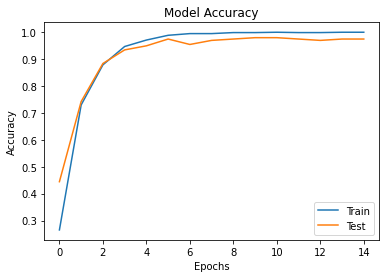

In [248]:
# plotting the model accuracy vs the number of epochs
plt.Figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [249]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

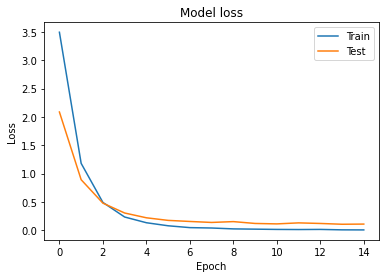

In [250]:
plot_loss(history.history['loss'], history.history['val_loss'])